In [1]:
import darts
#explore dart and FLAML by microsoft i.e fast lightweight auto ml

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from darts import TimeSeries
from darts.models import NBEATSModel
from darts import datasets
from darts.metrics import mape, smape, mae
from darts.dataprocessing.transformers import Scaler

c:\Users\Mukund Mishra\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = datasets.AirPassengersDataset().load()

In [4]:
data 
type(data)

darts.timeseries.TimeSeries

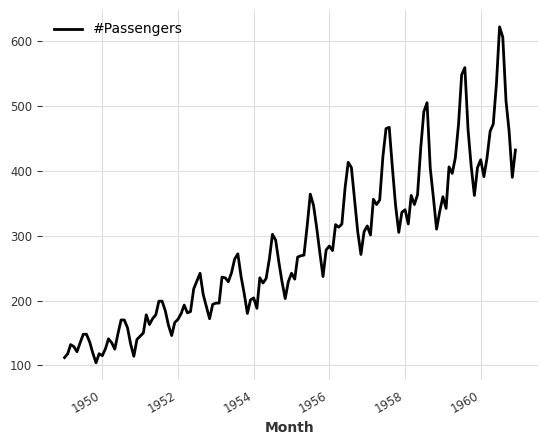

In [5]:
data.plot()

In [6]:
datascaler = Scaler()

In [7]:
scaled_data = datascaler.fit_transform(data)

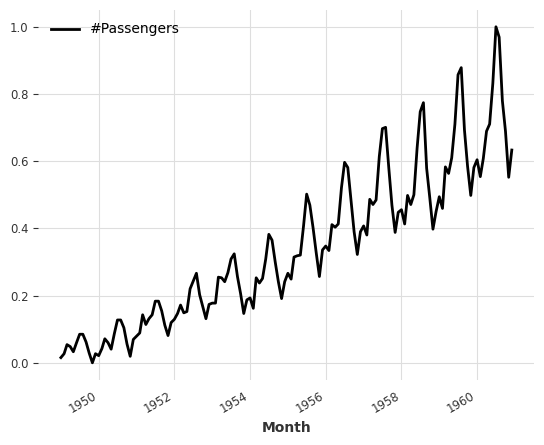

In [8]:
scaled_data.plot()

In [9]:
train, test = scaled_data[: -36], scaled_data[-36:]

In [10]:
len(scaled_data)

144

In [11]:
model = NBEATSModel(input_chunk_length = 30, output_chunk_length = 15, n_epochs = 300, random_state = 0)

In [12]:
model.fit(train, verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.5 K     Non-trainable params
6.2 M     Total params
49.956    Total estimated model params size (MB)


Epoch 299: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s, loss=0.000101, train_loss=7.47e-5] 

`Trainer.fit` stopped: `max_epochs=300` reached.


Epoch 299: 100%|██████████| 2/2 [00:00<00:00,  4.17it/s, loss=0.000101, train_loss=7.47e-5]


In [20]:
prediction = model.predict(n=20, series=scaled_data)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 36.36it/s]


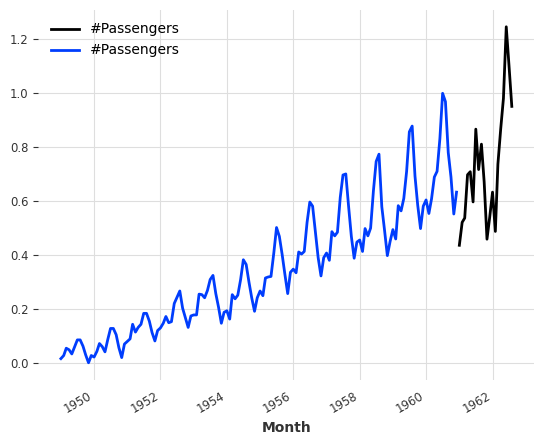

In [21]:
prediction.plot()
scaled_data.plot()

In [15]:
# Darts is nice and easy 
# actually very nice 

In [16]:
import pickle


In [31]:
model


In [27]:
pickle.dump(model, open('dartmodel.pkl', 'wb'))


In [46]:
pickled_model = pickle.load(open('dartmodel.pkl', 'rb'))

with open('dartmodel.pkl', "rb") as fh:
    abc =  pickle.load(fh)

In [47]:
print(abc)
print(pickled_model)

In [44]:
abc.fit(train, verbose=True)

TypeError: TorchForecastingModel.fit() missing 1 required positional argument: 'series'

In [48]:
abc.predict(n=10).plot()
scaled_data.plot()

AttributeError: 'NoneType' object has no attribute 'set_predict_parameters'